# Data Visualization

Select a dataset we have used in class (or outside of class).

Generate a plot that you feel visualizes the data is an interesting way. Your plot should have the following elements:

>1) Title
>2) Legend
>3) Axes or other Labels
>4) Color
>5) 1 sentence description of what your plot shows
>6) Brief description of why you chose to make the plot the way you did.

You may use pandas, matplotlib, or seaborn.

In [7]:
import pandas as pd
import numpy as np
import geopandas as geo
import geoplot as gplot
import country_converter as converter
import mapclassify as mc
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'

In [8]:
# load
billionaires = pd.read_csv('billionaire.csv')
eco = pd.read_csv('eco.csv')

In [9]:
# filter
billionaires = billionaires[~billionaires['Name'].str.contains('family')]
result = billionaires['Country'].value_counts()
b = pd.DataFrame()
b['Country'] = result.index
b['Billionaire_count'] = result.values
cc = converter.CountryConverter()
b['ISO_A3'] = cc.convert(b['Country'],to='ISO3')
b.drop('Country', axis=1, inplace=True)

eco.drop(columns=['CountryID', 
                  'WEBNAME', 
                  'Region', 
                  '2021 Score',
                  'World Rank', 
                  'Region Rank',
                  'Country', 
                  'Population (Millions)',
                  'Tax Burden',
                  'Govt Spending',
                  'Govt Expenditure % of GDP ',
                  'GDP (Billions, PPP)',
                  'GDP Growth Rate (%)',
                  '5 Year GDP Growth Rate (%)',
                  'GDP per Capita (PPP)',
                  'Unemployment (%)',
                  'Public Debt (% of GDP)'
                 ],
        axis=1,
        inplace=True)
cc = converter.CountryConverter()
eco['ISO_A3'] = cc.convert(eco['Country Name'],
                           to='ISO3')
eco.drop('Country Name', axis=1, inplace=True)
eco = eco.rename(columns={'Property Rights': 'prop_frdm',
                          'Judical Effectiveness': 'judi_efct',
                          'Government Integrity': 'govt_intg',
                          'Fiscal Health': 'fscl_hlth',
                          'Business Freedom': 'bsns_frdm',
                          'Labor Freedom': 'labr_frdm',
                          'Monetary Freedom': 'mone_frdm',
                          'Trade Freedom': 'trad_frdm',
                          'Investment Freedom ': 'ivst_frdm',
                          'Financial Freedom': 'fina_frdm',
                          'Tariff Rate (%)': 'trff_rate',
                          'Income Tax Rate (%)': 'incm_tax_rate',
                          'Corporate Tax Rate (%)': 'corp_tax_rate',
                          'Tax Burden % of GDP': 'tax_burd_gdp',
                          'Inflation (%)': 'infl',
                          'FDI Inflow (Millions)': 'fdi',
                         })

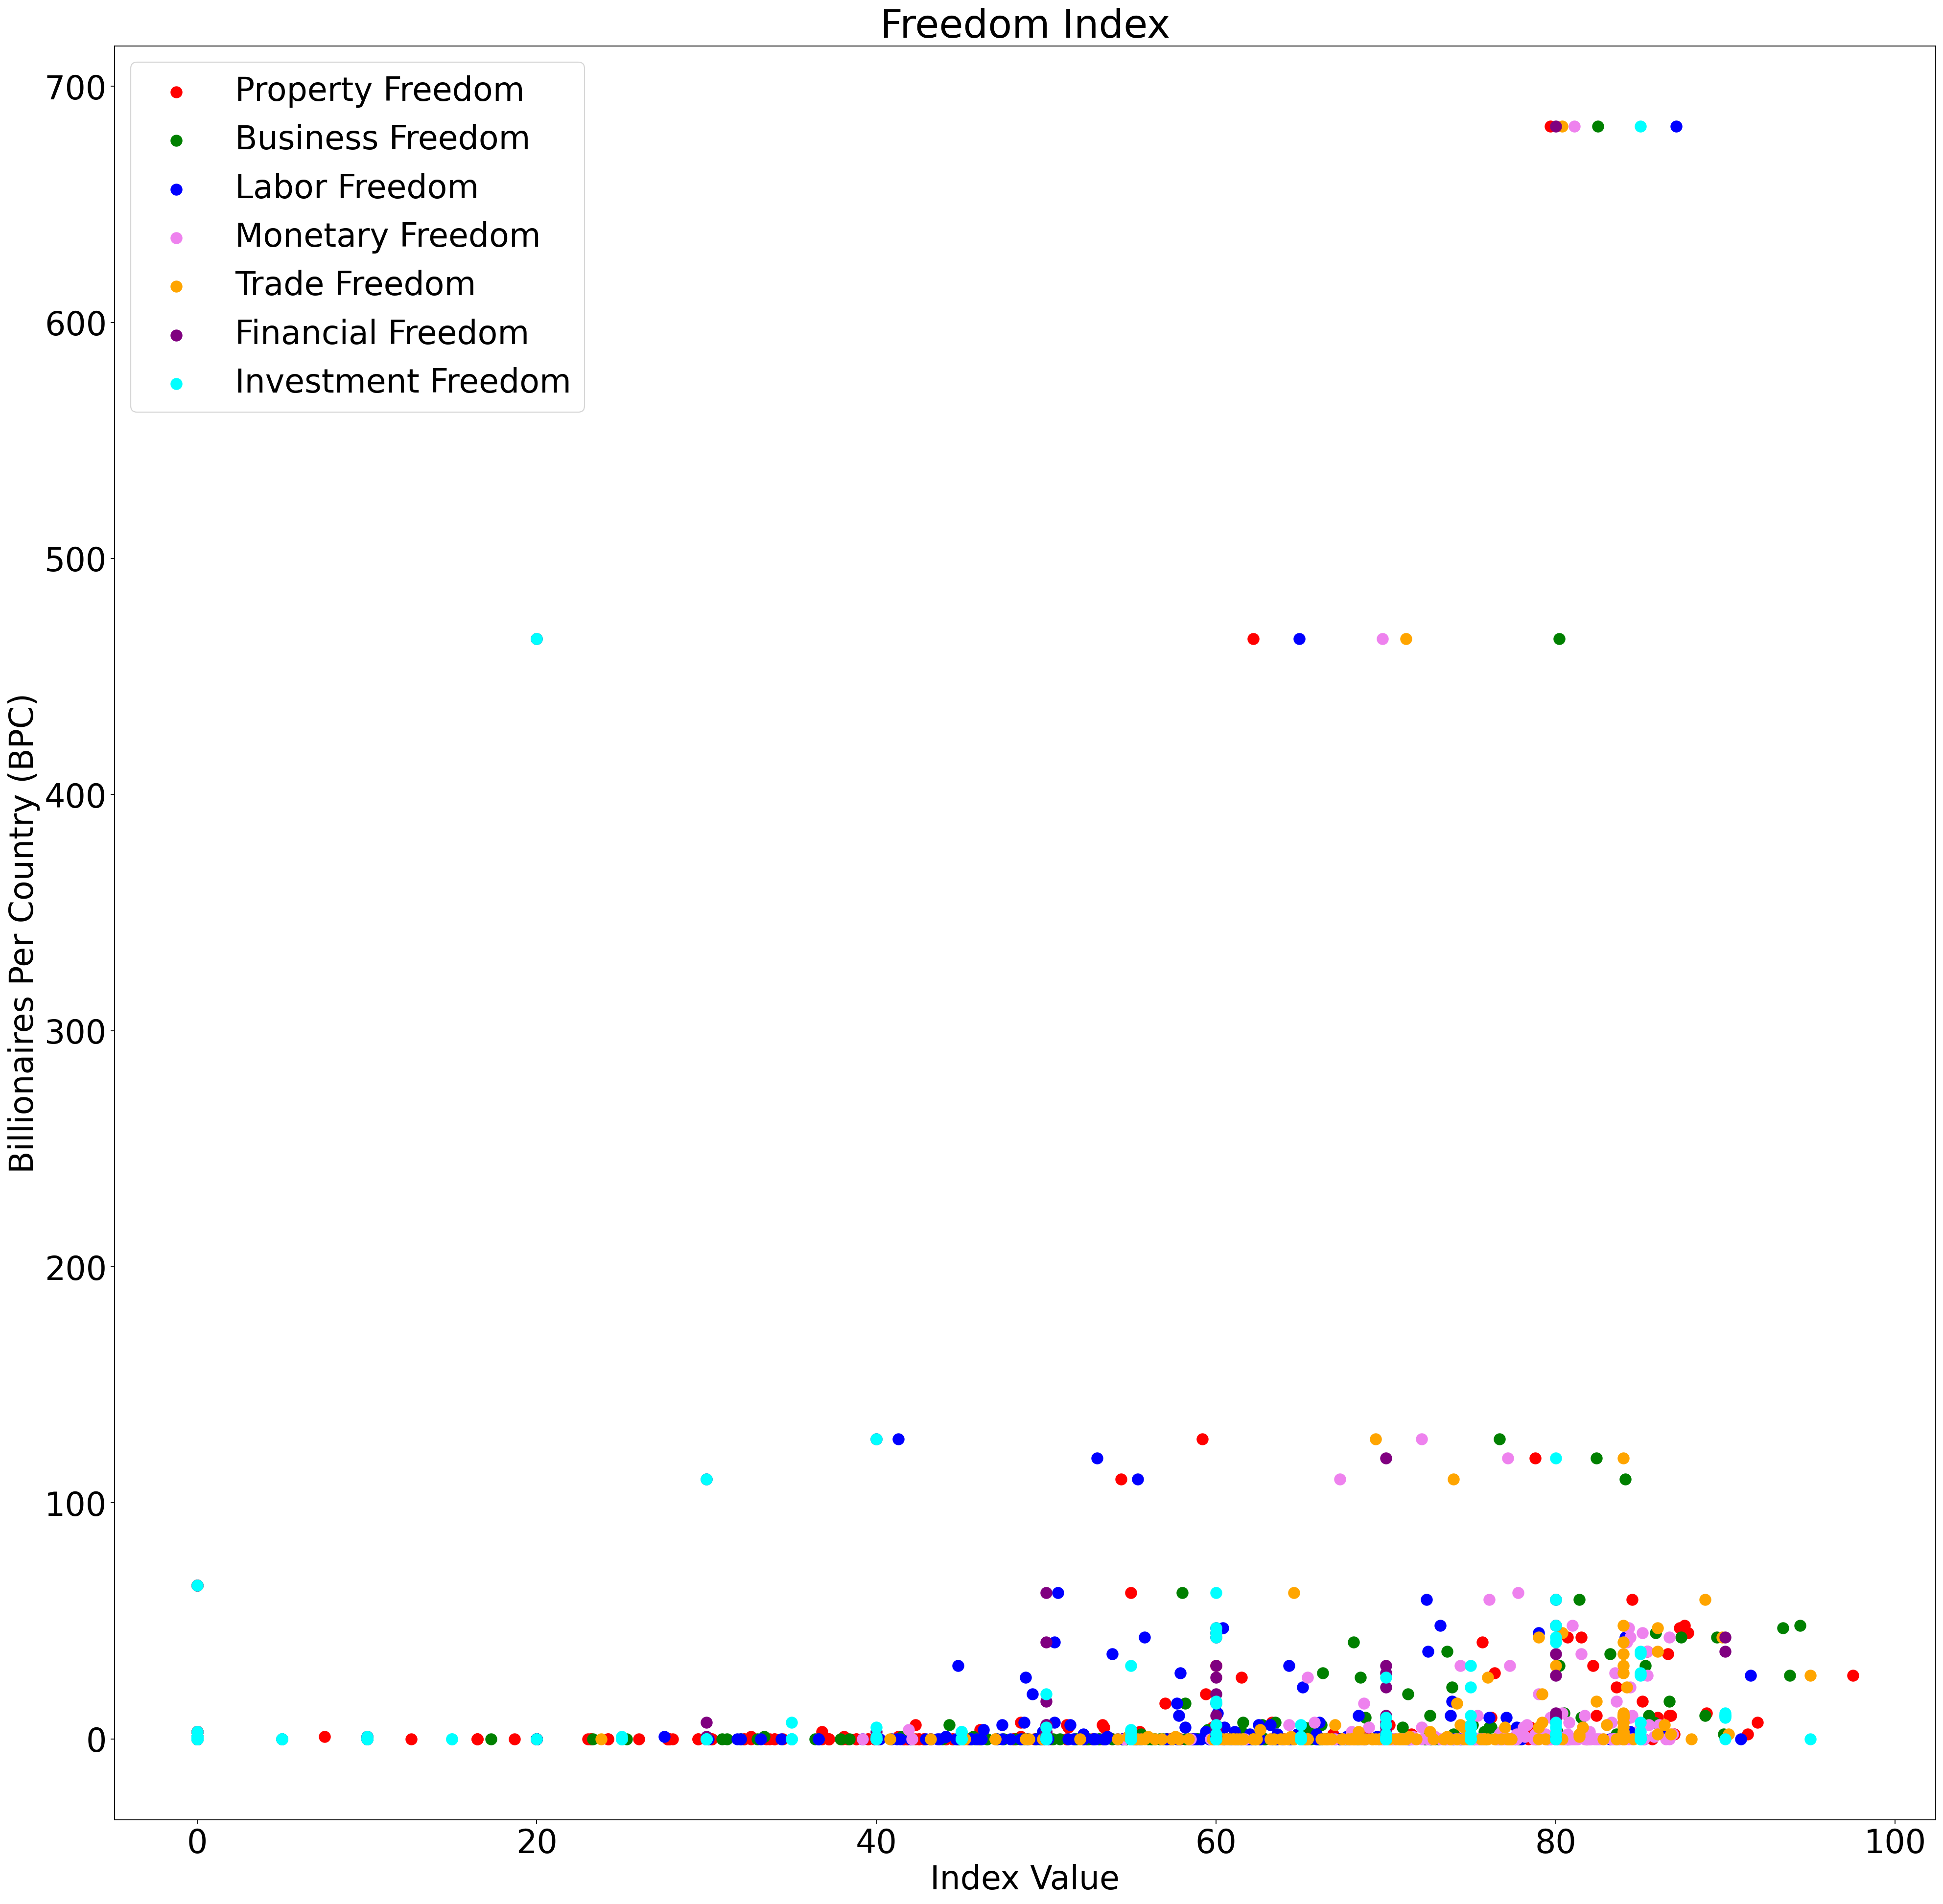

In [53]:
fi = pd.merge(eco[['prop_frdm',
                   'bsns_frdm',
                   'labr_frdm',
                   'mone_frdm',
                   'trad_frdm',
                   'fina_frdm',
                   'ivst_frdm',
                   'ISO_A3']],
              b, 
              left_on='ISO_A3', 
              right_on='ISO_A3', 
              how='outer')
fi.drop(columns='ISO_A3', 
        axis=1,
       inplace=True)
fi['Billionaire_count'] = fi['Billionaire_count'].apply(lambda x: 0 if np.isnan(x) else x)
fi['prop_frdm'] = fi['prop_frdm'].apply(lambda x: 0 if np.isnan(x) else x)
fi['bsns_frdm'] = fi['bsns_frdm'].apply(lambda x: 0 if np.isnan(x) else x) 
fi['labr_frdm'] = fi['labr_frdm'].apply(lambda x: 0 if np.isnan(x) else x) 
fi['mone_frdm'] = fi['mone_frdm'].apply(lambda x: 0 if np.isnan(x) else x)
fi['trad_frdm'] = fi['trad_frdm'].apply(lambda x: 0 if np.isnan(x) else x)
fi['fina_frdm'] = fi['fina_frdm'].apply(lambda x: 0 if np.isnan(x) else x)
fi['ivst_frdm'] = fi['ivst_frdm'].apply(lambda x: 0 if np.isnan(x) else x)

plt.figure(figsize=(30,30),dpi=80)
plt.rcParams.update({'font.size':30})
plt.title('Freedom Index')
plt.xlabel('Index Value')
plt.ylabel('Billionaires Per Country (BPC)')
plt.figsize=(30,30)
plt.scatter(fi['prop_frdm'],
            fi['Billionaire_count'],
            s=100,
            c='red',
            label='Property Freedom')
plt.scatter(fi['bsns_frdm'],
            fi['Billionaire_count'],
            s=100,
            c='green',
            label='Business Freedom')
plt.scatter(fi['labr_frdm'],
            fi['Billionaire_count'],
            s=100,
            c='blue',
            label='Labor Freedom')
plt.scatter(fi['mone_frdm'],
            fi['Billionaire_count'],
            s=100,
            c='violet',
            label='Monetary Freedom')
plt.scatter(fi['trad_frdm'],
            fi['Billionaire_count'],
            s=100,
            c='orange',
            label='Trade Freedom')
plt.scatter(fi['fina_frdm'],
            fi['Billionaire_count'],
            s=100,
            c='purple',
            label='Financial Freedom')
plt.scatter(fi['ivst_frdm'],
            fi['Billionaire_count'],
            s=100,
            c='aqua',
            label='Investment Freedom')

plt.legend(loc='upper left')
plt.show()


# fi.plot.scatter.title('Freedom Index')

# ax1 = fi.plot.scatter(x='prop_frdm',
#                       y='Billionaire_count',
#                       s=100,
#                       c='red',
#                       figsize=(30,30)
#                       title='Freedom Index')
# ax2 = fi.plot.scatter(x='bsns_frdm',
#                       y='Billionaire_count',
#                       s=100,
#                       c='green',
#                       ax=ax1)
# ax3 = fi.plot.scatter(x='labr_frdm',
#                       y='Billionaire_count',
#                       s=100,
#                       c='blue',
#                       ax=ax1)
# ax4 = fi.plot.scatter(x='mone_frdm',
#                       y='Billionaire_count',
#                       s=100,
#                       c='violet',
#                       ax=ax1)
# ax5 = fi.plot.scatter(x='trad_frdm',
#                       y='Billionaire_count',
#                       s=100,
#                       c='orange',
#                       ax=ax1)
# ax6 = fi.plot.scatter(x='fina_frdm',
#                       y='Billionaire_count',
#                       s=100,
#                       c='purple',
#                       ax=ax1)
# ax7 = fi.plot.scatter(x='ivst_frdm',
#                       y='Billionaire_count',
#                       s=100,
#                       c='aqua',
#                       ax=ax1)

Shows: The index values per country of a subset of the <i>Index of Economic Freedom<i> data set versus the number of billionaires per country.

In [ ]:
Why: Plotted so as to draw correlations between the subset of index values and the number of billionaires in a country, so as to developt 